In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functools import reduce
from pylab import rcParams
import glob
import os

### Load Data

In [2]:
path_central_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\CentralR-N'
all_files_central_novice = glob.glob(os.path.join(path_central_novice, "*.json"))

central_novice = pd.concat((pd.read_json(f) for f in all_files_central_novice), ignore_index=True)

path_east_novice = r'C:\Users\imnku\Documents\Data Analysis\AMQ\EastR-N'
all_files_east_novice = glob.glob(os.path.join(path_east_novice, "*.json"))

east_novice = pd.concat((pd.read_json(f) for f in all_files_east_novice), ignore_index=True)

novice = pd.concat(([central_novice, east_novice]), ignore_index=True)
novice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameMode       855 non-null    object 
 1   name           855 non-null    object 
 2   artist         855 non-null    object 
 3   anime          855 non-null    object 
 4   annId          855 non-null    int64  
 5   songNumber     855 non-null    int64  
 6   activePlayers  855 non-null    int64  
 7   totalPlayers   855 non-null    int64  
 8   type           855 non-null    object 
 9   urls           855 non-null    object 
 10  siteIds        855 non-null    object 
 11  difficulty     855 non-null    float64
 12  animeType      855 non-null    object 
 13  animeScore     855 non-null    float64
 14  vintage        855 non-null    object 
 15  tags           855 non-null    object 
 16  genre          855 non-null    object 
 17  altAnswers     855 non-null    object 
 18  startSampl

### Drop less useful data

In [3]:
X = novice.drop(['annId', 'urls', 'siteIds', 'animeScore', 'altAnswers', 'selfAnswer', 'fromList', 'gameMode'], axis=1).copy()

In [4]:
X[89:90]

,name,artist,anime,songNumber,activePlayers,totalPlayers,type,difficulty,animeType,vintage,tags,genre,startSample,videoLength,players,correct
89,THEME FROM LUPIN III,Peatmac Junior,"{'english': 'Lupin III: Part II', 'romaji': 'L...",45,225,242,Opening 2,43.7,TV,Fall 1977,"[Police, Seinen, Male Protagonist, Anti-Hero, ...","[Action, Adventure, Comedy, Mystery]",23,79.41,"[{'name': '22xt', 'score': 21, 'correctGuesses...",True


### Find any null data

In [5]:
X.isnull().sum()

name             0
artist           0
anime            0
songNumber       0
activePlayers    0
totalPlayers     0
type             0
difficulty       0
animeType        0
vintage          0
tags             0
genre            0
startSample      0
videoLength      3
players          0
correct          0
dtype: int64

In [6]:
X[X['videoLength'].isnull()]

,name,artist,anime,songNumber,activePlayers,totalPlayers,type,difficulty,animeType,vintage,tags,genre,startSample,videoLength,players,correct
746,to the beginning,Kalafina,"{'english': 'Fate/Zero', 'romaji': 'Fate/Zero'}",27,128,134,Opening 1,75.7,TV,Spring 2012,"[Magic, Swordplay, Tragedy, CGI, Gore, Battle ...","[Action, Drama, Fantasy, Supernatural]",36,NaN,"[{'name': '11_', 'score': 15, 'correctGuesses'...",False
747,ideal white,Mashiro Ayano,{'english': 'Fate/stay night: Unlimited Blade ...,28,127,134,Opening 1,61.2,TV,Fall 2014,"[Magic, Swordplay, School, Super Power, Male P...","[Action, Fantasy, Supernatural]",28,NaN,"[{'name': '11_', 'score': 15, 'correctGuesses'...",False
748,GAMERS!,"Hisako Kanemoto, Manaka Iwami, Rumi Ookubo","{'english': 'Gamers!', 'romaji': 'Gamers!'}",29,128,134,Opening 1,70.7,TV,Summer 2017,"[Parody, School, Slapstick, School Club, Otaku...","[Comedy, Drama, Romance, Slice of Life]",36,NaN,"[{'name': '11_', 'score': 15, 'correctGuesses'...",False


Looks like it corresponds to unloaded songs, we will drop these rows

In [7]:
X = X.dropna()
X.isnull().sum()

name             0
artist           0
anime            0
songNumber       0
activePlayers    0
totalPlayers     0
type             0
difficulty       0
animeType        0
vintage          0
tags             0
genre            0
startSample      0
videoLength      0
players          0
correct          0
dtype: int64

In [8]:
X['players'][0][0]

{'name': '1KiiN',
 'score': 1,
 'correctGuesses': 1,
 'correct': True,
 'answer': 'Serial Experiments Lain',
 'guessTime': 4455,
 'active': True,
 'position': 1,
 'positionSlot': 53}

In [9]:
for index, row in X.iterrows():
    count = 0
    for i in X['players'][index]:
        if i['correct']:
            count += 1
    X.loc[index, 'correctNumber'] = count

In [10]:
X['correctPercent'] = X['correctNumber']/X['activePlayers']
X['samplePercent'] = X['startSample']/X['videoLength']
X['type_noNumber'] = X['type'].str.split().str[0]
X['AiredDate'] = X['vintage'].replace({'Winter': '1', 'Spring': '4', 'Summer': '7', 'Fall': '10'}, regex=True)
X['AiredDate'] = pd.to_datetime(X['AiredDate'], format='%m %Y')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 854
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            852 non-null    object        
 1   artist          852 non-null    object        
 2   anime           852 non-null    object        
 3   songNumber      852 non-null    int64         
 4   activePlayers   852 non-null    int64         
 5   totalPlayers    852 non-null    int64         
 6   type            852 non-null    object        
 7   difficulty      852 non-null    float64       
 8   animeType       852 non-null    object        
 9   vintage         852 non-null    object        
 10  tags            852 non-null    object        
 11  genre           852 non-null    object        
 12  startSample     852 non-null    int64         
 13  videoLength     852 non-null    float64       
 14  players         852 non-null    object        
 15  correc

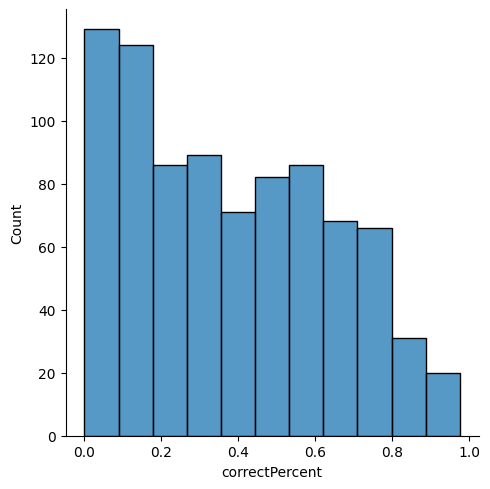

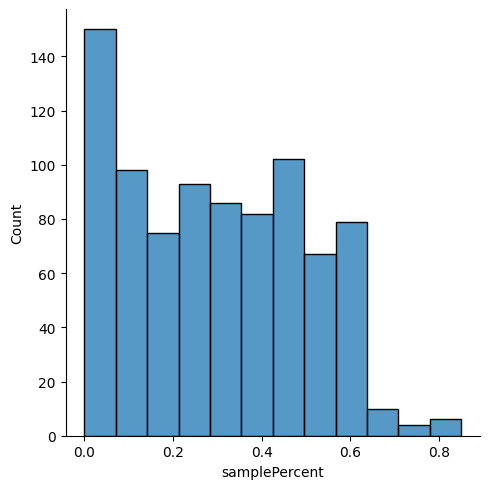

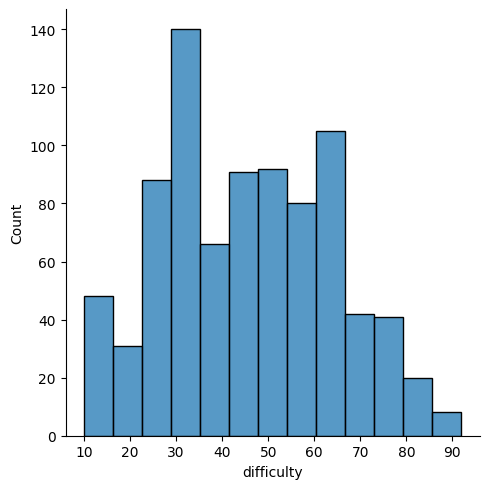

In [11]:
sns.displot(X, x='correctPercent')
sns.displot(X, x='samplePercent')
sns.displot(X, x='difficulty')

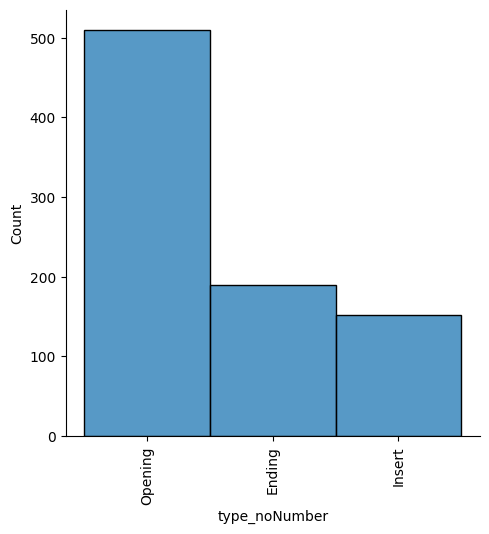

In [12]:
sns.displot(X, x='type_noNumber')
plt.xticks(rotation=90)
plt.show()

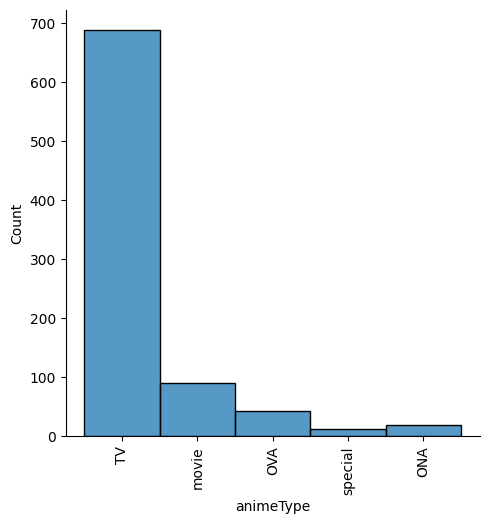

In [13]:
sns.displot(X, x='animeType')
plt.xticks(rotation=90)
plt.show()

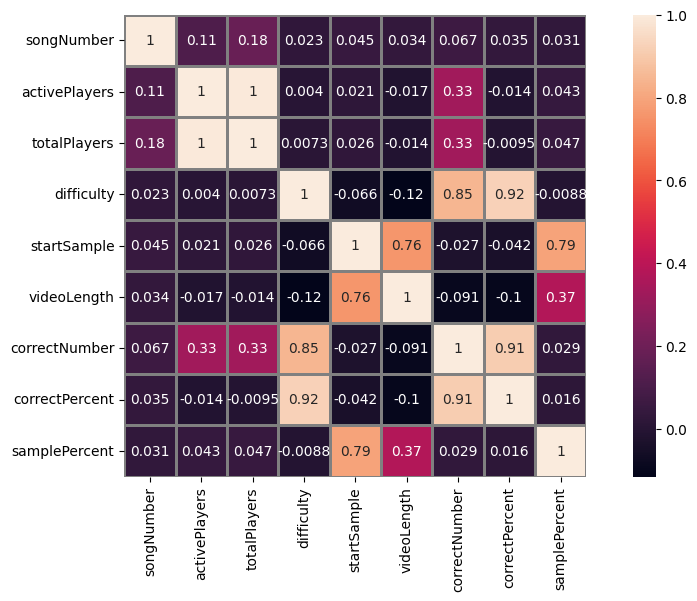

In [16]:
cm = X.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, square=True, linewidths=1, linecolor='gray')
plt.show()

<AxesSubplot: xlabel='AiredDate'>

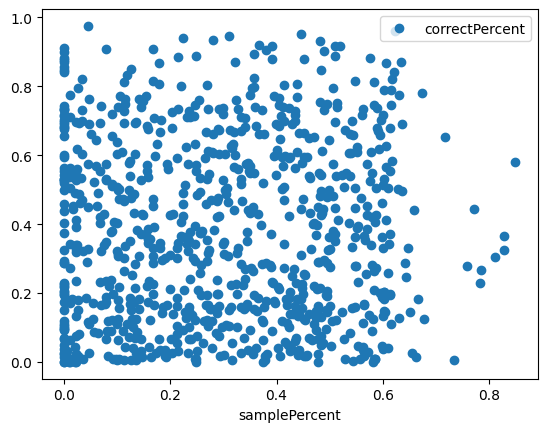

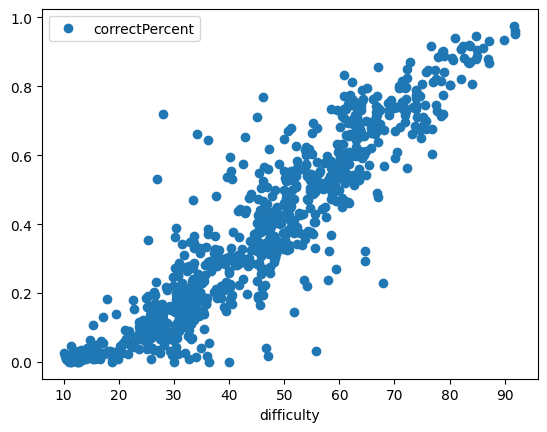

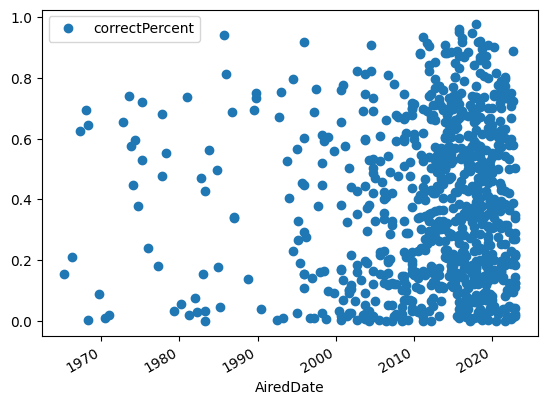

In [17]:
X.plot(x='samplePercent', y='correctPercent', style='o')
X.plot(x='difficulty', y='correctPercent', style='o')
X.plot(x='AiredDate', y='correctPercent', style='o')

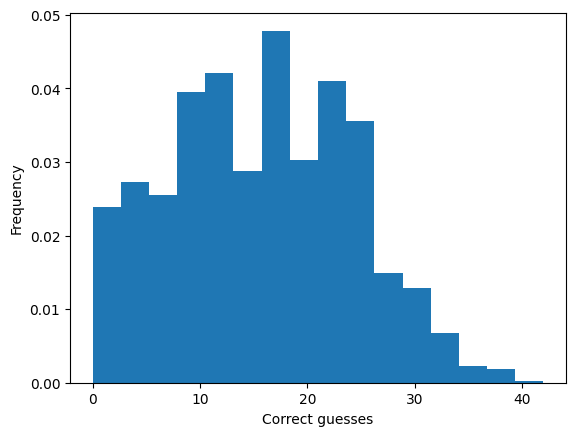

In [18]:
last_song = X.loc[X['songNumber'] == 45]['players']
final_score = np.array([])
for index in last_song:
    count = np.zeros(len(index))
    for i, player in enumerate(index):
        count[i] = player['score']
    final_score = np.append(final_score, count)

plt.hist(final_score, bins=16, density=True)
plt.ylabel('Frequency')
plt.xlabel('Correct guesses')
plt.show()

In [19]:
X['artist'] = X['artist'].str.replace(' & ', ',')
X['artist'] = X['artist'].str.replace(', ', ',')
X['artist'] = X['artist'].str.split(',')

In [20]:
X

,name,artist,anime,songNumber,activePlayers,totalPlayers,type,difficulty,animeType,vintage,...,genre,startSample,videoLength,players,correct,correctNumber,correctPercent,samplePercent,type_noNumber,AiredDate
0,DUVET,[BOA],"{'english': 'Serial Experiments Lain', 'romaji...",1,211,211,Opening 1,70.1,TV,Summer 1998,...,"[Drama, Mystery, Psychological, Sci-Fi, Supern...",43,101.54,"[{'name': '1KiiN', 'score': 1, 'correctGuesses...",True,125.0,0.592417,0.423478,Opening,1998-07-01
1,Akatsuki no Yona,[Ryo Kunihiko],"{'english': 'Yona of the Dawn', 'romaji': 'Aka...",2,220,220,Opening 1,61.8,TV,Fall 2014,...,"[Action, Adventure, Comedy, Drama, Fantasy, Ro...",36,89.83,"[{'name': '1KiiN', 'score': 2, 'correctGuesses...",True,133.0,0.604545,0.400757,Opening,2014-10-01
2,"Key -bring it on, my Destiny-",[Lenny code fiction],"{'english': 'D.Gray-man Hallow', 'romaji': 'D....",3,225,225,Opening 1,31.7,TV,Summer 2016,...,"[Action, Adventure, Comedy]",32,89.47,"[{'name': '1KiiN', 'score': 3, 'correctGuesses...",False,44.0,0.195556,0.357662,Opening,2016-07-01
3,Ishukan Communication,[Chorogons],"{'english': 'Miss Kobayashi's Dragon Maid', 'r...",4,226,227,Ending 1,64.7,TV,Winter 2017,...,"[Comedy, Fantasy, Romance, Slice of Life]",49,88.97,"[{'name': '1KiiN', 'score': 4, 'correctGuesses...",True,138.0,0.610619,0.550747,Ending,2017-01-01
4,Naisho no Hanashi,[Megumi Nakajima],"{'english': 'Tamayura: More Aggressive', 'roma...",5,227,228,Insert Song,25.4,TV,Summer 2013,...,"[Comedy, Slice of Life]",21,89.04,"[{'name': '1KiiN', 'score': 5, 'correctGuesses...",False,15.0,0.066079,0.235849,Insert,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,Omokage Warp,[nano.RIPE],{'english': 'Hanasaku Iroha: Blossoms for Tomo...,41,134,141,Opening 2,45.1,TV,Spring 2011,...,"[Comedy, Drama, Slice of Life]",49,91.18,"[{'name': '5okumajika', 'score': 17, 'correctG...",1,54.0,0.402985,0.537399,Opening,2011-04-01
851,Ah Jinsei ni Namida Ari,"[Ayane Sakura, Akari Kitou]","{'english': 'Tsukimichi: Moonlit Fantasy', 'ro...",42,133,142,Ending 3,25.7,TV,Summer 2021,...,"[Action, Adventure, Comedy, Fantasy]",49,85.37,"[{'name': '5okumajika', 'score': 17, 'correctG...",0,18.0,0.135338,0.573972,Ending,2021-07-01
852,Jiyuu no Tsubasa,[Linked Horizon],"{'english': 'Attack on Titan', 'romaji': 'Shin...",43,133,143,Opening 2,77.7,TV,Spring 2013,...,"[Action, Drama, Fantasy, Mystery]",10,88.54,"[{'name': '5okumajika', 'score': 17, 'correctG...",1,97.0,0.729323,0.112943,Opening,2013-04-01
853,Sen no Tsubasa,[livetune adding Takuro Sugawara (from 9mm Par...,"{'english': 'Re: Hamatora', 'romaji': 'Re:␣Ham...",44,133,143,Opening 1,53.8,TV,Summer 2014,...,"[Comedy, Mystery]",1,88.99,"[{'name': '5okumajika', 'score': 18, 'correctG...",1,74.0,0.556391,0.011237,Opening,2014-07-01
